In [7]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import catboost
#from catboost import Pool
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

In [8]:
sales=pd.read_csv("table1.csv")

In [9]:
sales.head()

,Item ID,Country,Date,Price,Sales
0,A,Germany,1/1/2018,1.00,25
1,A,Sweden,1/2/2018,2.00,26
2,A,France,1/3/2018,3.00,2
3,A,Austria,1/4/2018,4.00,3
4,A,Hngary,1/5/2018,5.00,4


In [10]:
items=pd.read_csv("table2.csv")

In [11]:
items.head()

,ItemID,Name,CategoryID
0,A,Amisu Blouse,123
1,B,FSBN,456
2,C,FB Sister,789
3,D,FSBN,456
4,E,FB Sister,789


In [22]:
train = sales.merge(items,left_on='Item ID', right_on='ItemID')

In [35]:
#train.head()

In [36]:
#train.describe()

### Time period of the dataset

In [32]:
#print('Min date from train set: %s' % train['Date'].min().date())
#print('Max date from train set: %s' % train['Date'].max().date())

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 8 columns):
Item ID       394 non-null object
Country       394 non-null object
Date          394 non-null object
Price         394 non-null float64
Sales         394 non-null int64
ItemID        394 non-null object
Name          394 non-null object
CategoryID    394 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 27.7+ KB


In [28]:
train['Date'] = train['Date'].astype('datetime64[ns]')

In [30]:
train.head()

,Item ID,Country,Date,Price,Sales,ItemID,Name,CategoryID
0,A,Germany,2018-01-01,1.00,25,A,Amisu Blouse,123
1,A,Sweden,2018-01-02,2.00,26,A,Amisu Blouse,123
2,A,France,2018-01-03,3.00,2,A,Amisu Blouse,123
3,A,Austria,2018-01-04,4.00,3,A,Amisu Blouse,123
4,A,Hngary,2018-01-05,5.00,4,A,Amisu Blouse,123


In [31]:
print('Min date from train set: %s' % train['Date'].min().date())
print('Max date from train set: %s' % train['Date'].max().date())

Min date from train set: 2018-01-01
Max date from train set: 2018-10-29


In [33]:
train.isnull().sum().sort_values(ascending=False)

CategoryID    0
Name          0
ItemID        0
Sales         0
Price         0
Date          0
Country       0
Item ID       0
dtype: int64

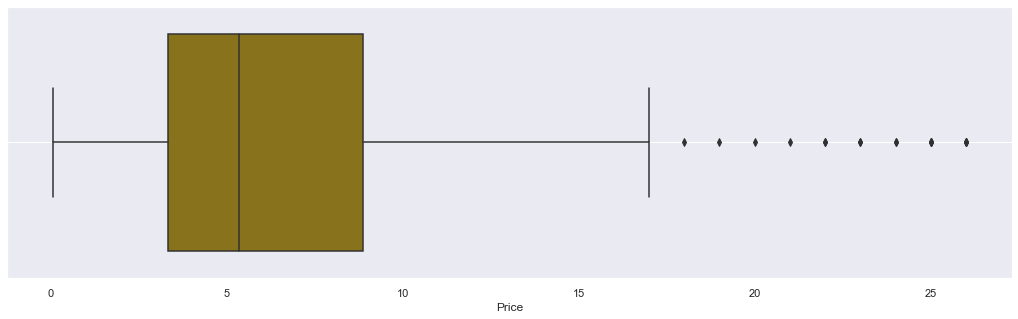

In [34]:

plt.figure(figsize=(18,5))
sns.boxplot(y="Price",data=train, orient="h", color="#9A7D0A")
sns.set_color_codes(palette="colorblind")
#sns.distplot(df['X18'],color="#BB8FCE", ax=axes[1])
plt.grid()

In [37]:
train = train[np.abs(train["Price"]-train["Price"].mean())<=(3*train["Price"].std())] 

In [40]:
#train.info()